In [1]:
pip uninstall xlrd

Found existing installation: xlrd 1.1.0
Uninstalling xlrd-1.1.0:
  Would remove:
    /usr/local/bin/runxlrd.py
    /usr/local/lib/python3.7/dist-packages/xlrd-1.1.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/xlrd/*
Proceed (y/n)? y
  Successfully uninstalled xlrd-1.1.0


In [2]:
pip install xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 5.5 MB/s 


In [3]:
pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
pip install --user pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 17.9 MB/s 
     |████████████████████████████████| 9.8 MB 57.7 MB/s 


In [5]:
pip install pystan==2.19.1.1 prophet 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 86 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0


In [6]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib 
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
df = pd.read_excel('sample.xls')

In [7]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2019-138688,2019-06-12,2019-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2018-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2018-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [8]:
furniture = df.loc[df['Category'] == 'Furniture']
furniture['Order Date'].min(), furniture['Order Date'].max()
cols = ['Row ID','Order ID','Ship Mode','Customer ID','Customer Name','Segment','Country/Region','City','State','Postal Code','Region','Product ID','Category','Sub-Category','Product Name','Quantity','Discount','Profit']
furniture.drop(cols,axis=1,inplace=True)
furniture = furniture.sort_values('Order Date')
furniture.isnull().sum()
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2017-01-06', '2017-01-07', '2017-01-10', '2017-01-11',
               '2017-01-13', '2017-01-14', '2017-01-16', '2017-01-19',
               '2017-01-20', '2017-01-21',
               ...
               '2020-12-18', '2020-12-19', '2020-12-21', '2020-12-22',
               '2020-12-23', '2020-12-24', '2020-12-25', '2020-12-28',
               '2020-12-29', '2020-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [9]:
furniture = df.loc[df['Category'] == 'Furniture']
furniture['Order Date'].min(), furniture['Order Date'].max()
cols = ['Row ID','Order ID','Ship Mode','Customer ID','Customer Name','Segment','Country/Region','City','State','Postal Code','Region','Product ID','Category','Sub-Category','Product Name','Quantity','Discount','Profit']
furniture.drop(cols,axis=1,inplace=True)
furniture = furniture.sort_values('Order Date')
furniture.isnull().sum()
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture = furniture.set_index('Order Date')

Order Date
2017-01-01     480.194231
2017-02-01     367.931600
2017-03-01     857.291529
2017-04-01     567.488357
2017-05-01     432.049188
2017-06-01     695.059242
2017-07-01     601.169500
2017-08-01     457.521656
2017-09-01     992.353367
2017-10-01     769.015437
2017-11-01     980.221486
2017-12-01    1532.298325
2018-01-01     978.328467
2018-02-01     522.395667
2018-03-01     781.236437
2018-04-01     805.822962
2018-05-01     624.996700
2018-06-01     428.565500
2018-07-01     719.706316
2018-08-01     602.412012
2018-09-01    1382.790684
2018-10-01     632.980184
2018-11-01    1286.701354
2018-12-01    1049.355418
2019-01-01     508.182867
2019-02-01     356.868273
2019-03-01     609.575810
2019-04-01     695.373158
2019-05-01     687.265227
2019-06-01     816.910750
2019-07-01     768.736412
2019-08-01     734.307782
2019-09-01    1135.953371
2019-10-01     624.872474
2019-11-01    1271.345152
2019-12-01    1410.719808
2020-01-01     397.602133
2020-02-01     528.179800
2

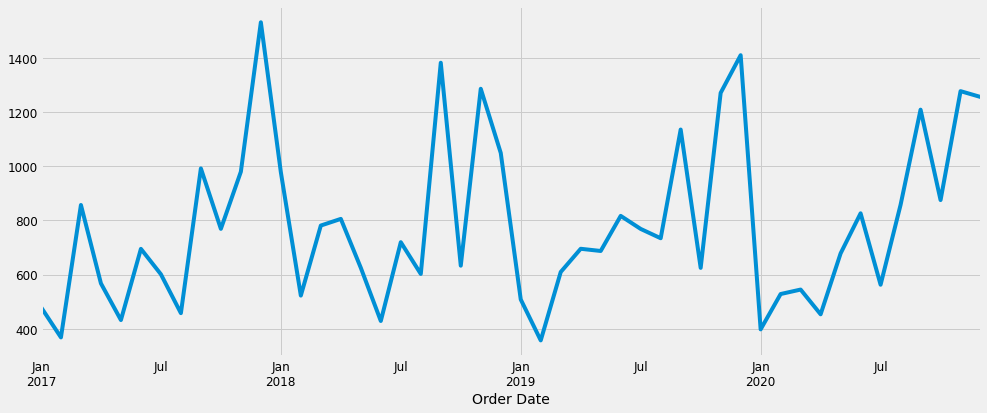

In [10]:
#visualization
y = furniture['Sales'].resample('MS').mean()
print(y['2017':])
y.plot(figsize=(15,6))
plt.show()

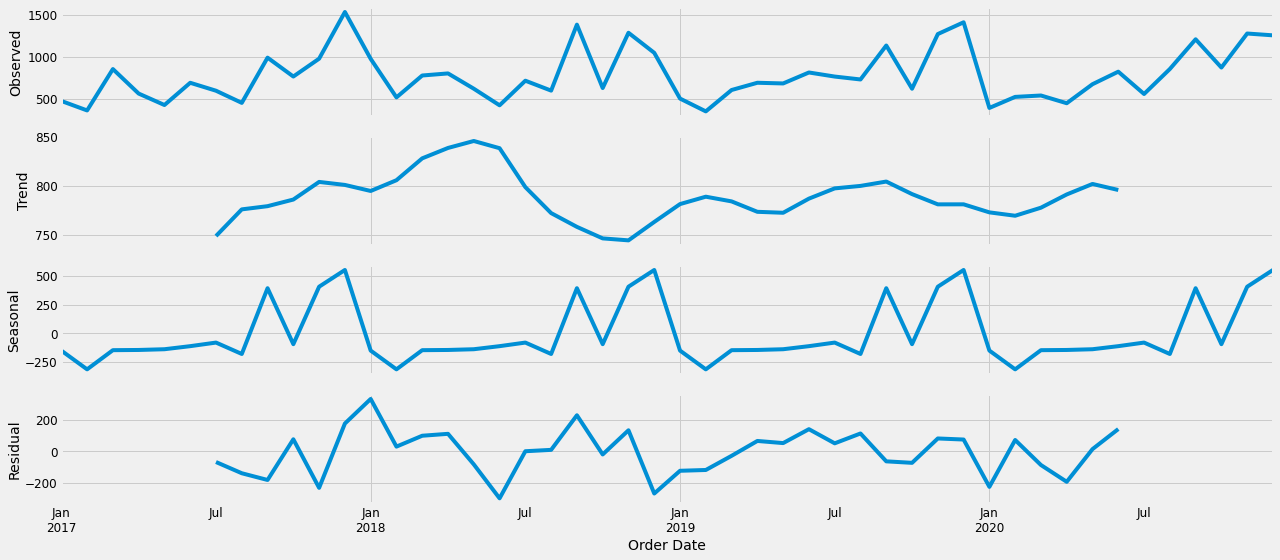

Examples of parameter combinations for seasonal arima
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 0, 1) x (0, 1, 1, 12)
SARIMAX: (0, 0, 1) x (1, 0, 0, 12)


In [11]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8 
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

#giving p,d,q value for arima model
p = d = q = range(0,2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print("Examples of parameter combinations for seasonal arima")
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[4]))



ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:769.0817523205915
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1447.9568704136177
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:477.7170130919703
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:497.2314433418338


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1314.4533646477407
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:318.0047199116341
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:720.9252270758097
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2854.07097442964
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:466.56074298091517


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:499.591257738131
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2793.883050669192
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:319.9884876946867
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:677.8947668259312
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1363.557134110724
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:486.6378567269187
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:497.78896630044073


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1383.458576144629
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:319.7714068109212
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:649.9056176816798
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:2573.5241691237097
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:458.87055484830336
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:486.1832977442769
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:2731.0629056222538
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:310.75743684173284
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:692.1645522067713
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1393.6213595625052


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:479.4632147852136
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:480.92593679351955


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1290.9773755653473
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:304.4664675084592
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:665.7794442186333
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:82100.2383627503
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:468.3685195814208
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:482.5763323876942
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:195896.2501364051
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:306.01560021226715
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:671.2513547541902
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1363.7890070108738
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:479.2003422281136


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:475.3403658784638
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1982.8968610558716
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:300.62709013454094
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:649.0318019835543
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:2789.720557177447
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:460.47626876098246
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:469.5250354660787
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:90983.18858949211
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:297.78754395391843
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0676      0.238      0.284      0.776      -0.398       0.534
ma.L1         -0.9988      9.431     -0.106      0.916     -19.484      17.486
ar.S.L12      -0.4807      0.148     -3.248      0.001      -0.771      -0.191
sigma2      4.113e+04   3.83e+05      0.107      0.914   -7.09e+05    7.91e+05


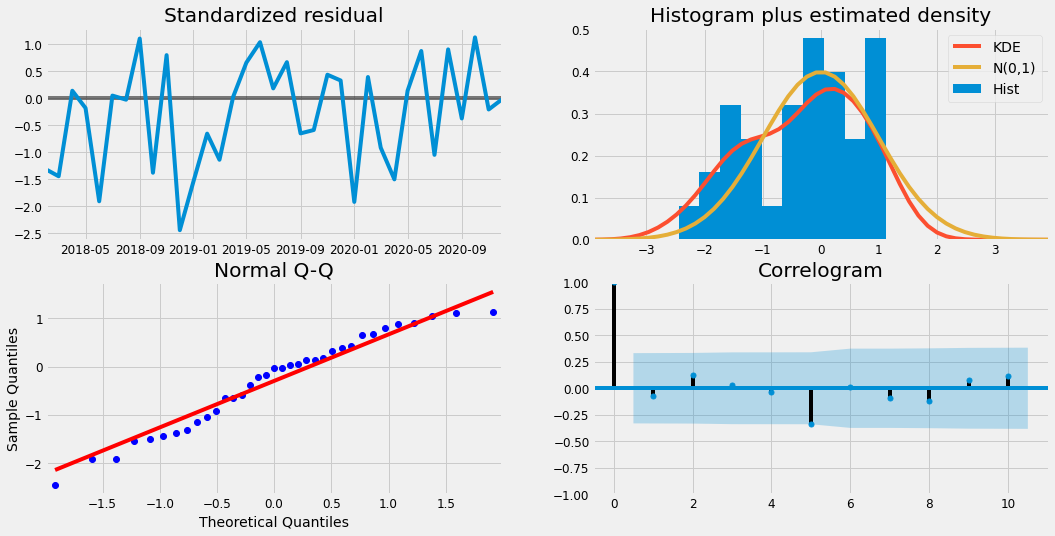

In [12]:
#time series forecasting with arima
for param in pdq:
  for param_seasonal in seasonal_pdq:
    try:
      mod = sm.tsa.statespace.SARIMAX(y,
                                      order=param,
                                      seasonal_order=param_seasonal,
                                      enforce_stationarity=False,
                                      enforce_invertibility=False)
      results = mod.fit()
      print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
    except:
      continue
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1,1,1),
                                seasonal_order=(1,1,0,12),
                                enfore_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])
results.plot_diagnostics(figsize=(16,8))
plt.show()

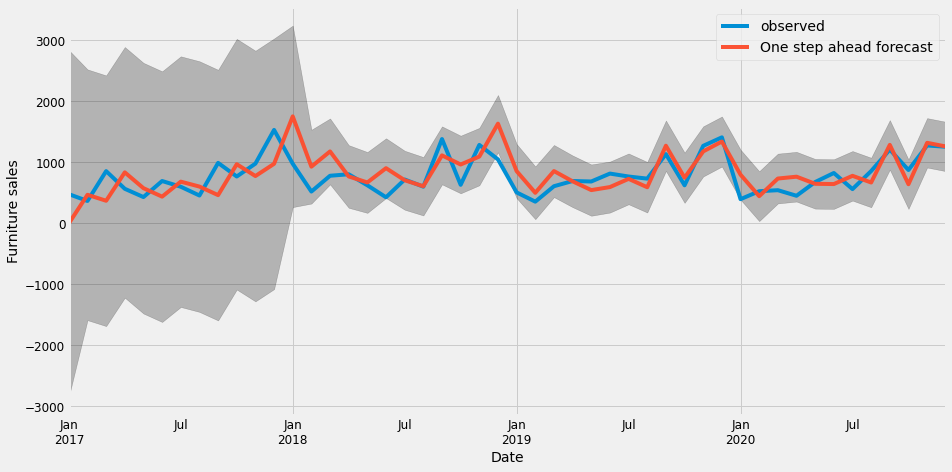

In [13]:
#getting prediction

pred = results.get_prediction(start=pd.to_datetime('2017-01-01'),dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label = 'observed')
pred.predicted_mean.plot(ax=ax, label='One step ahead forecast', alpha=7, figsize=(14,7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:,0],
                pred_ci.iloc[:,1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture sales')
plt.legend()
plt.show()

The Mean Squared Error of our forecasts is 80769.14
The Root Mean Squared Error of our forecasts is 284.2


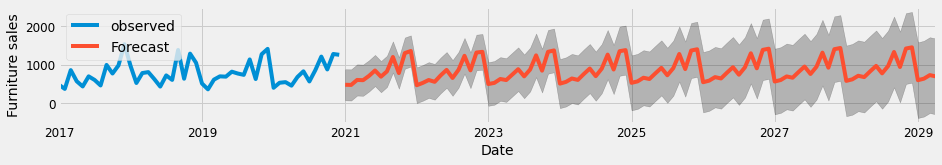

In [14]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
nse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(nse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(nse), 2)))
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed',figsize=(14,2))
pred_uc.predicted_mean.plot(ax=ax,label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:,1],color='k',alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture sales')
plt.legend()
plt.show()

In [15]:
#Comparing furniture and office supplies 
furniture = df.loc[df['Category'] == 'Furniture']
office = df.loc[df['Category'] == 'Office Supplies'] 
furniture.shape, office.shape
#furniture['Order Date'].min(), furniture['Order Date'].max()
cols = ['Row ID','Order ID','Ship Mode','Customer ID','Customer Name','Segment','Country/Region','City','State','Postal Code','Region','Product ID','Category','Sub-Category','Product Name','Quantity','Discount','Profit']
furniture.drop(cols,axis=1,inplace=True)
office.drop(cols,axis=1,inplace=True)
furniture = furniture.sort_values('Order Date')
office = office.sort_values('Order Date')
furniture.isnull().sum()
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
office = office.groupby('Order Date')['Sales'].sum().reset_index()
furniture = furniture.set_index('Order Date')
office = office.set_index('Order Date')
#furniture.index
furniture.shape, office.shape

((889, 1), (1147, 1))

In [16]:
y_furniture = furniture['Sales'].resample('MS').mean()
y_office = office['Sales'].resample('MS').mean()
furniture = pd.DataFrame({'Order Date':y_furniture.index, 'Sales':y_furniture.values})
office = pd.DataFrame({'Order Date': y_office.index, 'Sales': y_office.values})

In [17]:
store = furniture.merge(office, how='inner', on='Order Date')
store.rename(columns={'Sales_x': 'furniture_sales', 'Sales_y': 'office_sales'},inplace=True)
store.head()

,Order Date,furniture_sales,office_sales
0,2017-01-01,480.194231,285.357647
1,2017-02-01,367.931600,63.042588
2,2017-03-01,857.291529,391.176318
3,2017-04-01,567.488357,464.794750
4,2017-05-01,432.049188,324.346545


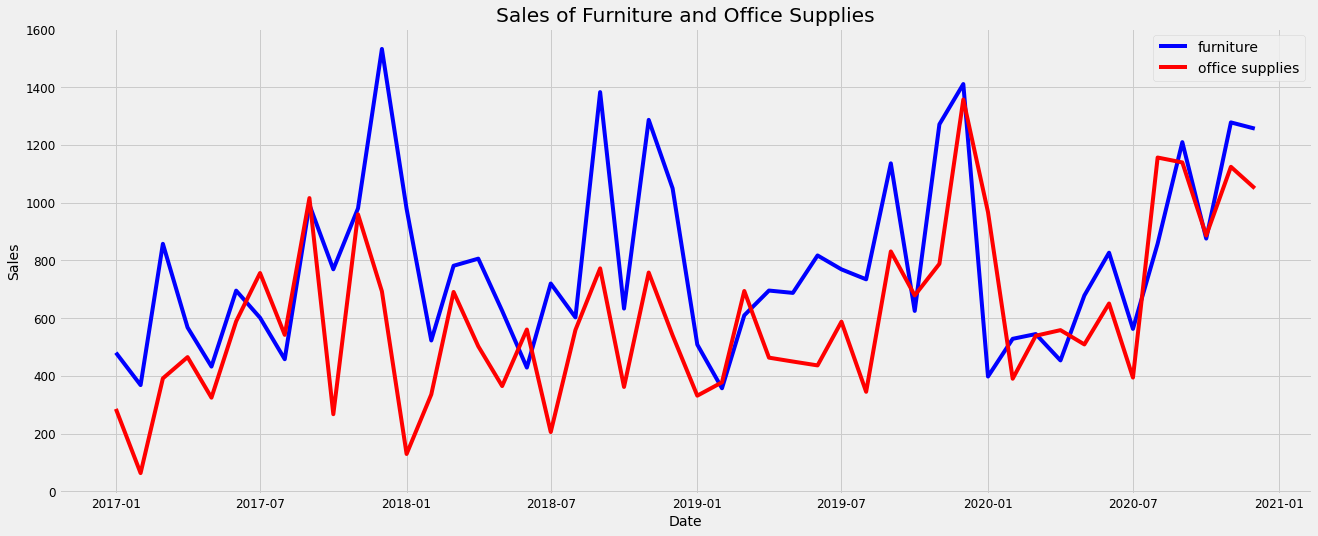

In [18]:
plt.figure(figsize=(20,8))
plt.plot(store['Order Date'], store['furniture_sales'], 'b-', label = 'furniture')
plt.plot(store['Order Date'], store['office_sales'], 'r-', label='office supplies')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales of Furniture and Office Supplies')
plt.legend()

In [19]:
from prophet import Prophet
furniture = furniture.rename(columns={'Order Date': 'ds', 'Sales': 'y'})

In [20]:
furniture_model = Prophet(interval_width=0.95)
furniture_model.fit(furniture)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm773w0lo/2uyjr18q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm773w0lo/udva2knd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6748', 'data', 'file=/tmp/tmpm773w0lo/2uyjr18q.json', 'init=/tmp/tmpm773w0lo/udva2knd.json', 'output', 'file=/tmp/tmpcioi7j8d/prophet_model-20220810171243.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
17:12:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:12:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [21]:
office = office.rename(columns={'Order Date':'ds',
                              'Sales': 'y'})

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm773w0lo/jfi6nr9y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm773w0lo/ig6ef09d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55793', 'data', 'file=/tmp/tmpm773w0lo/jfi6nr9y.json', 'init=/tmp/tmpm773w0lo/ig6ef09d.json', 'output', 'file=/tmp/tmp65oire6v/prophet_model-20220810171310.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
17:13:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:13:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Text(0.5, 1.0, 'Furniture Sales')

<Figure size 1296x432 with 0 Axes>

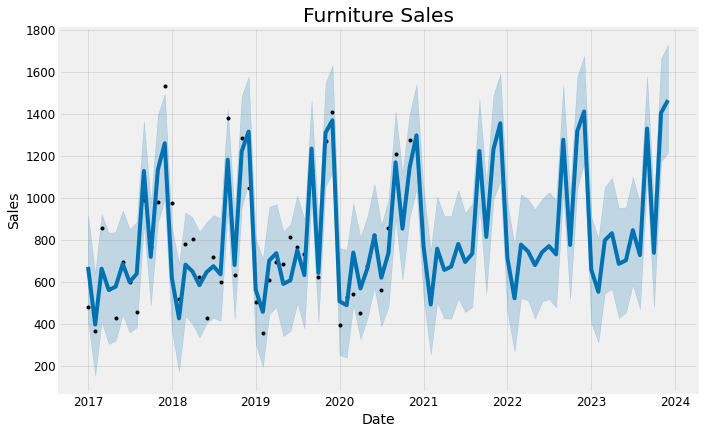

In [22]:
office_model = Prophet(interval_width=0.95)
office_model.fit(office)
furniture_forecast = furniture_model.make_future_dataframe(periods=36,freq='MS')
furniture_forecast = furniture_model.predict(furniture_forecast)
office_forecast = office_model.make_future_dataframe(periods=36,freq='MS')
office_forecast = office_model.predict(office_forecast)
plt.figure(figsize=(18,6))
furniture_model.plot(furniture_forecast, xlabel='Date',ylabel='Sales')
plt.title('Furniture Sales')